# Trade-offs

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [5]:
pal_c = sns.color_palette("tab10")

In [1]:
!pip install seaborn==0.10.1

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import seaborn as sns

In [3]:
sns.__version__

'0.10.1'

In [6]:
dict_marker = {"perturbation":"o", "baseline":"X", "gradient":"s"}
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [7]:
sns.set_context("notebook", rc={"legend.fontsize":15, "legend.title_fontsize":20, 
                                "axes.titlesize":22,"axes.labelsize":20,
                               "xtick.labelsize" : 20, "ytick.labelsize" : 20})
sns.set_style("whitegrid")

In [8]:
def explainer_type(row):
    print(row['explainer_name'])
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('perturbation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

## Real world dataset

In [9]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/real/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/real/topk/config_real_topk_5expe.json'
ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'nc_real_topk_5expe.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'topk', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [10]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


In [11]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [12]:
df_res = df_res.reset_index()
#df_res = df_res[df_res.explainer_name!="pgexplainer"]
#df_res = df_res[df_res.dataset!="texas"]
df_res

,dataset,true_label_as_target,hard_mask,topk,explainer_name,num_test_x,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,time,number_of_edges,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
0,actor,False,False,1.0,basic_gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,5.66230,60918.0,2.000,2.000000,-4.000000,-4.000000,0.648,0.882239,0.003682,0.023564
1,actor,False,False,1.0,distance,100.0,-1.000,-1.000,-1.000000,-1.000000,...,0.79156,60918.0,2.000,2.000000,-4.000000,-4.000000,0.656,0.891088,0.024267,0.113292
2,actor,False,False,1.0,gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4.56018,60918.0,2.000,2.000000,-4.000000,-4.000000,0.654,0.893942,0.139550,0.580592
3,actor,False,False,1.0,gradcam,100.0,-1.000,-1.000,-1.000000,-1.000000,...,0.00598,60918.0,2.000,2.000000,-4.000000,-4.000000,0.706,0.912413,0.054446,0.219569
4,actor,False,False,1.0,ig,100.0,-1.000,-1.000,-1.000000,-1.000000,...,0.35788,60918.0,2.000,2.000000,-4.000000,-4.000000,0.600,0.877511,0.193342,0.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,wisconsin,True,True,100.0,pgexplainer,100.0,0.152,0.462,0.005386,0.067498,...,0.03004,1151.0,0.538,0.932502,0.010710,0.237032,2.000,2.000000,-4.000000,-4.000000
3780,wisconsin,True,True,100.0,pgmexplainer,100.0,0.448,0.094,0.085688,-0.007603,...,2.26486,1151.0,0.906,1.007603,0.157944,0.599539,2.000,2.000000,-4.000000,-4.000000
3781,wisconsin,True,True,100.0,random,100.0,0.136,0.424,0.003373,0.076974,...,0.00008,1151.0,0.576,0.923026,0.006722,0.220045,2.000,2.000000,-4.000000,-4.000000
3782,wisconsin,True,True,100.0,sa,100.0,0.542,0.382,0.129789,0.039249,...,0.00410,1151.0,0.618,0.960751,0.228684,0.577510,2.000,2.000000,-4.000000,-4.000000


In [13]:
df_res.columns

Index(['dataset', 'true_label_as_target', 'hard_mask', 'topk',
       'explainer_name', 'num_test_x', 'fidelity_acc+', 'fidelity_acc-',
       'fidelity_prob+', 'fidelity_prob-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'num_test_init', 'mask_size_init', 'mask_entropy_init', 'max_avg_init',
       'num_test_transf', 'mask_size_transf', 'mask_entropy_transf',
       'max_avg_transf', 'cc_ratio', 'num_test_y', 'time', 'number_of_edges',
       '1-fidelity_acc-', '1-fidelity_prob-', 'charact_prob', 'charact_acc',
       '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-', 'charact_gnn_prob',
       'charact_gnn_acc'],
      dtype='object')

In [14]:
df_res.loc[df_res['true_label_as_target']==False, 'charact_prob'] = df_res['charact_gnn_prob']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_prob+'] = df_res['fidelity_gnn_prob+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_prob-"] = df_res["1-fidelity_gnn_prob-"]

df_res.loc[df_res['true_label_as_target']==False, 'charact_acc'] = df_res['charact_gnn_acc']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_acc+'] = df_res['fidelity_gnn_acc+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_acc-"] = df_res["1-fidelity_gnn_acc-"]


In [15]:
datasets = [
      "cora",
      "pubmed",
      "citeseer",
      "cornell",
      "texas",
      "wisconsin",
      "actor",
      "chameleon",
    "squirrel",
    "facebook"
    ]

## Rank methods

In [16]:
# choose size of explanation
topk_val = 10

In [17]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).apply(lambda g: g.mean(skipna=False)).reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]
dfc = pd.pivot_table(dfc, values=["charact_acc"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

/tmp/ipykernel_23356/2367888581.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfc = dfs.groupby(["dataset", "explainer_name"]).apply(lambda g: g.mean(skipna=False)).reset_index()


charact_acc                                          \
dataset                  actor chameleon  citeseer      cora   cornell   
explainer_name                                                           
sa                    0.511318  0.602114  0.817711  0.731563  0.518542   
occlusion             0.495255  0.505161  0.658917  0.648187  0.451772   
ig                    0.439700  0.452516  0.655563  0.508918  0.484942   
gradcam               0.410969  0.444139  0.556056  0.529801  0.382514   
pagerank              0.326469  0.382375  0.659608  0.534203  0.457779   
gnnexplainer          0.391040  0.475855  0.633122  0.496059  0.306084   
pgmexplainer          0.298891  0.367774  0.632839  0.471322  0.293838   
distance              0.319990  0.334130  0.443916  0.282974  0.175673   
subgraphx             0.220220  0.328750  0.419920  0.125036  0.076176   
random                0.309781  0.368718  0.148898  0.137612  0.043290   
basic_gnnexplainer    0.210100  0.217587  0.369691  0.200162  0.113932   
pgexplainer           0.246457  0.240715  0.336229  0.140179  0.138812   

                                                                      \
dataset             facebook    pubmed  squirrel     texas wisconsin   
explainer_name                                                         
sa                  0.583267  0.704792  0.631185  0.537886  0.592801   
occlusion                NaN  0.639638  0.511483  0.401268  0.606683   
ig                  0.432340  0.632507  0.475565  0.429413  0.495702   
gradcam             0.372396  0.519430  0.417195  0.347265  0.525324   
pagerank            0.308260  0.558082  0.347278  0.407092  0.483919   
gnnexplainer        0.312450  0.453679  0.475460  0.318838  0.544678   
pgmexplainer        0.250696  0.484543  0.338580  0.265549  0.395317   
distance            0.122263  0.295635  0.310710  0.192117  0.332888   
subgraphx           0.047702  0.182235       NaN  0.128933  0.252743   
random              0.114781  0.158662  0.384304  0.062914  0.181998   
basic_gnnexplainer  0.077254  0.149593  0.213337  0.118502  0.194909   
pgexplainer         0.066512  0.118999  0.232432  0.000000  0.138467   

                   mean_rank final_rank  
dataset                                  
explainer_name                           
sa                  0.623118        1.0  
occlusion           0.546485        2.0  
ig                  0.500717        3.0  
gradcam             0.450509        4.0  
pagerank            0.446507        5.0  
gnnexplainer        0.440726        6.0  
pgmexplainer        0.379935        7.0  
distance            0.281030        8.0  
subgraphx           0.197968        9.0  
random              0.191096       10.0  
basic_gnnexplainer  0.186507       11.0  
pgexplainer         0.165880       12.0

In [18]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Characterization'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Characterization'])

dfc = pd.pivot_table(dfc, values=['Characterization'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc = dfc.sort_values(by=['mean_rank'])
dfc

Characterization                                            \
dataset                       actor chameleon citeseer  cora cornell facebook   
explainer_name                                                                  
sa                              1.0       1.0      1.0   1.0     1.0      1.0   
occlusion                       2.0       2.0      3.0   2.0     4.0      NaN   
ig                              3.0       4.0      4.0   5.0     2.0      2.0   
pagerank                        6.0       6.0      2.0   3.0     3.0      5.0   
gradcam                         4.0       5.0      7.0   4.0     5.0      3.0   
gnnexplainer                    5.0       3.0      5.0   6.0     6.0      4.0   
pgmexplainer                    9.0       8.0      6.0   7.0     7.0      6.0   
distance                        7.0       9.0      8.0   8.0     8.0      7.0   
random                          8.0       7.0     12.0  11.0    12.0      8.0   
subgraphx                      11.0      10.0      9.0  12.0    11.0     11.0   
basic_gnnexplainer             12.0      12.0     10.0   9.0    10.0      9.0   
pgexplainer                    10.0      11.0     11.0  10.0     9.0     10.0   

                                                    mean_rank final_rank  
dataset            pubmed squirrel texas wisconsin                        
explainer_name                                                            
sa                    1.0      1.0   1.0       2.0   1.100000        1.0  
occlusion             2.0      2.0   4.0       1.0   2.444444        2.0  
ig                    3.0      3.0   2.0       5.0   3.300000        3.0  
pagerank              4.0      7.0   3.0       6.0   4.500000        4.0  
gradcam               5.0      5.0   5.0       4.0   4.700000        5.0  
gnnexplainer          7.0      4.0   6.0       3.0   4.900000        6.0  
pgmexplainer          6.0      8.0   7.0       7.0   7.100000        7.0  
distance              8.0      9.0   8.0       8.0   8.000000        8.0  
random               10.0      6.0  11.0      11.0   9.600000        9.0  
subgraphx             9.0      NaN   9.0       9.0  10.111111       10.0  
basic_gnnexplainer   11.0     11.0  10.0      10.0  10.400000       11.0  
pgexplainer          12.0     10.0  12.0      12.0  10.700000       12.0

In [19]:
dfc.columns = dfc.columns.droplevel(0) #remove amount
dfc.columns.name = None               #remove categories
dfc = dfc.reset_index()
dfc['type'] = dfc.apply(lambda row: explainer_type(row), axis=1)

sa
occlusion
ig
pagerank
gradcam
gnnexplainer
pgmexplainer
distance
random
subgraphx
basic_gnnexplainer
pgexplainer


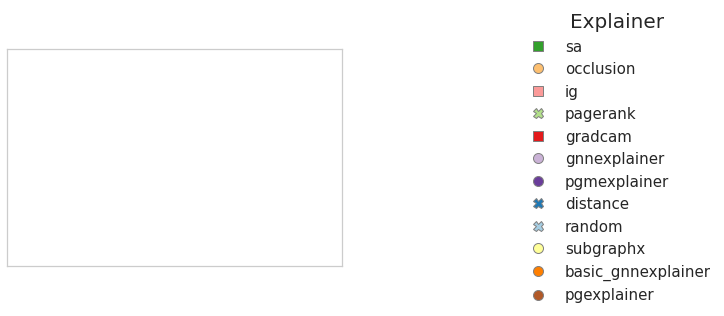

In [20]:
explainer_to_type_dict = dfc.set_index("explainer_name")["type"].to_dict()
handles, labels = [], []
for key, val in explainer_to_type_dict.items():
    # Using Line2D to create the markers for the legend. This is the creation of the proxy artists.
    handles.append(Line2D([0], [0], linewidth=0, color="grey", marker=dict_marker[val], markersize=10, markerfacecolor=dict_color[key]))
    labels.append(key)


# Calling the handles and labels to create the legend, where the handles are the club and circle created previously, and the labels are what the markers are labeled in the legend. Also moves the legend outside the figure
leg = plt.legend(handles,labels, loc = "center left", bbox_to_anchor = (1.5, 0.5), numpoints = 1, title="Explainer", frameon=False)

plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.savefig('/cluster/home/kamara/Explain/figures/real/5expe/legend_charact_rank_k10_5expe.pdf', bbox_inches='tight')
plt.savefig('/cluster/home/kamara/Explain/figures/real/5expe/legend_charact_rank_k10_5expe.png', bbox_inches='tight')

#### Necessary explanations

In [18]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'fidelity_acc+']]

dfc = pd.pivot_table(dfc, values=['fidelity_acc+'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

fidelity_acc+                                               \
dataset                    actor chameleon citeseer    cora cornell  facebook   
explainer_name                                                                  
sa                        0.3700  0.701250   0.8400  0.8290  0.3920  0.811265   
ig                        0.3250  0.640000   0.7850  0.7585  0.3490  0.595000   
occlusion                 0.3640  0.476500   0.5340  0.5440  0.3150       NaN   
gnnexplainer              0.2785  0.446500   0.5675  0.4220  0.1960  0.207000   
gradcam                   0.2845  0.367000   0.4315  0.4205  0.2605  0.257500   
pagerank                  0.2145  0.304500   0.5200  0.4130  0.3115  0.211000   
pgmexplainer              0.1965  0.296500   0.4830  0.3240  0.1745  0.153500   
distance                  0.2100  0.289000   0.3140  0.1795  0.1000  0.071000   
random                    0.2070  0.421500   0.1095  0.1000  0.0230  0.073500   
basic_gnnexplainer        0.1440  0.248500   0.2650  0.1315  0.0640  0.045500   
pgexplainer               0.2045  0.264500   0.2520  0.0930  0.1010  0.044000   
subgraphx                 0.1375  0.268155   0.2900  0.0700  0.0400  0.026190   

                                                       mean_rank final_rank  
dataset             pubmed  squirrel   texas wisconsin                       
explainer_name                                                               
sa                  0.7850  0.670000  0.4030    0.5830  0.638451        1.0  
ig                  0.5650  0.610000  0.3100    0.5015  0.543900        2.0  
occlusion           0.5125  0.464376  0.2740    0.4640  0.438708        3.0  
gnnexplainer        0.3520  0.424000  0.2015    0.4620  0.355700        4.0  
gradcam             0.3850  0.366000  0.2335    0.3965  0.340250        5.0  
pagerank            0.4200  0.297500  0.2680    0.3675  0.332750        6.0  
pgmexplainer        0.3400  0.289500  0.1565    0.2585  0.267250        7.0  
distance            0.1870  0.287500  0.1105    0.2100  0.195850        8.0  
random              0.0995  0.436500  0.0340    0.1220  0.162650        9.0  
basic_gnnexplainer  0.0885  0.245000  0.0670    0.1275  0.142650       10.0  
pgexplainer         0.0690  0.224500  0.0000    0.1065  0.135900       11.0  
subgraphx           0.1050  0.000000  0.0700    0.1500  0.115685       12.0

In [19]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "fidelity_acc+"]]

dfc['Necessary'] = dfc.groupby('dataset')['fidelity_acc+'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Necessary'])

dfc = pd.pivot_table(dfc, values=["Necessary"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Necessary                                                   \
dataset                actor chameleon citeseer  cora cornell facebook pubmed   
explainer_name                                                                  
sa                       1.0       1.0      1.0   1.0     1.0      1.0    1.0   
ig                       3.0       2.0      2.0   2.0     2.0      2.0    2.0   
occlusion                2.0       3.0      4.0   3.0     3.0      NaN    3.0   
gnnexplainer             5.0       4.0      3.0   4.0     6.0      5.0    6.0   
gradcam                  4.0       6.0      7.0   5.0     5.0      3.0    5.0   
pagerank                 6.0       7.0      5.0   6.0     4.0      4.0    4.0   
pgmexplainer            10.0       8.0      6.0   7.0     7.0      6.0    7.0   
distance                 7.0       9.0      8.0   8.0     9.0      8.0    8.0   
random                   8.0       5.0     12.0  10.0    12.0      7.0   10.0   
basic_gnnexplainer      11.0      12.0     10.0   9.0    10.0      9.0   11.0   
subgraphx               12.0      10.0      9.0  12.0    11.0     11.0    9.0   
pgexplainer              9.0      11.0     11.0  11.0     8.0     10.0   12.0   

                                            mean_rank final_rank  
dataset            squirrel texas wisconsin                       
explainer_name                                                    
sa                      1.0   1.0       1.0       1.0        1.0  
ig                      2.0   2.0       2.0       2.1        2.0  
occlusion               3.0   3.0       3.0       3.0        3.0  
gnnexplainer            5.0   6.0       4.0       4.8        4.0  
gradcam                 6.0   5.0       5.0       5.1        5.0  
pagerank                7.0   4.0       6.0       5.3        6.0  
pgmexplainer            8.0   7.0       7.0       7.3        7.0  
distance                9.0   8.0       8.0       8.2        8.0  
random                  4.0  11.0      11.0       9.0        9.0  
basic_gnnexplainer     10.0  10.0      10.0      10.2       10.0  
subgraphx              12.0   9.0       9.0      10.4       11.0  
pgexplainer            11.0  12.0      12.0      10.7       12.0

#### Sufficient explanations

In [34]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "1-fidelity_acc-"]]

dfc['Sufficient'] = dfc.groupby('dataset')['1-fidelity_acc-'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Sufficient'])
dfc = pd.pivot_table(dfc, values=["1-fidelity_acc-"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

1-fidelity_acc-                                     \
dataset                      actor chameleon citeseer    cora cornell   
explainer_name                                                          
occlusion                   0.9070  0.569500   0.9305  0.8635  0.9470   
gradcam                     0.8565  0.628000   0.9280  0.9110  0.9655   
pagerank                    0.8205  0.591500   0.9475  0.8995  0.9715   
pgmexplainer                0.8175  0.587000   0.9410  0.8770  0.9660   
distance                    0.8090  0.516000   0.8365  0.7305  0.9200   
gnnexplainer                0.8145  0.549500   0.7205  0.6335  0.7880   
sa                          0.8500  0.557250   0.8000  0.6580  0.7935   
subgraphx                   0.9125  0.540377   0.7800  0.6250  0.8750   
ig                          0.7300  0.405000   0.5750  0.3895  0.8310   
basic_gnnexplainer          0.7325  0.392000   0.6565  0.4690  0.6615   
random                      0.7190  0.374000   0.2920  0.2500  0.5410   
pgexplainer                    NaN  0.390000   0.2700  0.1800  0.5750   

                                                                mean_rank  \
dataset             facebook  pubmed squirrel   texas wisconsin             
explainer_name                                                              
occlusion                NaN  0.8590  0.63864  0.9330    0.9155  0.840404   
gradcam             0.792000  0.8550  0.61150  0.9550    0.8910  0.839350   
pagerank            0.759000  0.8450  0.61050  0.9680    0.8700  0.828300   
pgmexplainer        0.686500  0.8445  0.59650  0.9675    0.8935  0.817700   
distance            0.534500  0.7405  0.53400  0.9440    0.8505  0.741550   
gnnexplainer        0.650500  0.6600  0.63100  0.8280    0.6910  0.696650   
sa                  0.458706  0.6400  0.65000  0.8360    0.6180  0.686146   
subgraphx           0.482341  0.7000  0.00000  0.9500    0.9050  0.677022   
ig                  0.345000  0.7200  0.45500  0.7225    0.5060  0.567900   
basic_gnnexplainer  0.332000  0.4955  0.44150  0.6845    0.5025  0.536750   
random              0.264000  0.3960  0.43250  0.5830    0.4045  0.425600   
pgexplainer              NaN     NaN      NaN  0.6000    0.3950  0.401667   

                   final_rank  
dataset                        
explainer_name                 
occlusion                 1.0  
gradcam                   2.0  
pagerank                  3.0  
pgmexplainer              4.0  
distance                  5.0  
gnnexplainer              6.0  
sa                        7.0  
subgraphx                 8.0  
ig                        9.0  
basic_gnnexplainer       10.0  
random                   11.0  
pgexplainer              12.0

In [35]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "1-fidelity_acc-"]]

dfc['Sufficient'] = dfc.groupby('dataset')['1-fidelity_acc-'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Sufficient'])

dfc = pd.pivot_table(dfc, values=["Sufficient"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Causal                                                   \
dataset             actor chameleon citeseer  cora cornell facebook pubmed   
explainer_name                                                               
gradcam               3.0       1.0      4.0   1.0     3.0      1.0    2.0   
pagerank              5.0       2.0      1.0   2.0     1.0      2.0    3.0   
occlusion             2.0       4.0      3.0   4.0     4.0      NaN    1.0   
pgmexplainer          6.0       3.0      2.0   3.0     2.0      3.0    4.0   
distance              8.0       8.0      5.0   5.0     5.0      5.0    5.0   
subgraphx             1.0       7.0      7.0   8.0     6.0      6.0    7.0   
sa                    4.0       5.0      6.0   6.0     8.0      7.0    9.0   
gnnexplainer          7.0       6.0      8.0   7.0     9.0      4.0    8.0   
ig                   10.0       9.0     10.0  10.0     7.0      8.0    6.0   
basic_gnnexplainer    9.0      10.0      9.0   9.0    10.0      9.0   10.0   
random               11.0      12.0     11.0  11.0    12.0     10.0   11.0   
pgexplainer           NaN      11.0     12.0  12.0    11.0      NaN    NaN   

                                            mean_rank final_rank  
dataset            squirrel texas wisconsin                       
explainer_name                                                    
gradcam                 4.0   3.0       4.0       2.6        1.0  
pagerank                5.0   1.0       5.0       2.7        2.0  
occlusion               2.0   6.0       1.0       3.0        3.0  
pgmexplainer            6.0   2.0       3.0       3.4        4.0  
distance                7.0   5.0       6.0       5.9        5.5  
subgraphx              11.0   4.0       2.0       5.9        5.5  
sa                      1.0   7.0       8.0       6.1        7.0  
gnnexplainer            3.0   8.0       7.0       6.7        8.0  
ig                      8.0   9.0       9.0       8.6        9.0  
basic_gnnexplainer      9.0  10.0      10.0       9.5       10.0  
random                 10.0  12.0      11.0      11.1       11.0  
pgexplainer             NaN  11.0      12.0      11.5       12.0

#### Phenomenon

In [36]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'charact_acc']]

dfc = pd.pivot_table(dfc, values=['charact_acc'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                                          \
dataset                  actor chameleon  citeseer      cora   cornell   
explainer_name                                                           
sa                    0.416135  0.554987  0.749467  0.700786  0.452637   
ig                    0.394815  0.512579  0.643995  0.546106  0.419492   
occlusion             0.309836  0.441373  0.553832  0.572140  0.365057   
pagerank              0.247221  0.341939  0.591030  0.496036  0.402661   
gradcam               0.287619  0.380427  0.458616  0.463788  0.313342   
gnnexplainer          0.253036  0.414758  0.534413  0.445298  0.237588   
pgmexplainer          0.201023  0.322995  0.550619  0.427584  0.253368   
distance              0.234521  0.303918  0.383718  0.253883  0.151662   
random                0.232217  0.391674  0.144121  0.136107  0.036372   
subgraphx             0.165217  0.248452  0.368145  0.108943  0.057902   
basic_gnnexplainer    0.151486  0.224118  0.325560  0.172314  0.101444   
pgexplainer                NaN  0.200930  0.018947  0.000000  0.019412   

                                                                      \
dataset             facebook    pubmed  squirrel     texas wisconsin   
explainer_name                                                         
sa                  0.593916  0.670487  0.568580  0.466556  0.540234   
ig                  0.456170  0.610548  0.507555  0.377866  0.488217   
occlusion                NaN  0.565666  0.419832  0.311183  0.501450   
pagerank            0.301770  0.543861  0.302230  0.358742  0.434738   
gradcam             0.343288  0.461959  0.338051  0.272275  0.450587   
gnnexplainer        0.289206  0.400436  0.391489  0.247453  0.466696   
pgmexplainer        0.236723  0.464648  0.294419  0.213637  0.323113   
distance            0.119592  0.287450  0.280311  0.153045  0.296996   
random              0.114862  0.155287  0.393366  0.051524  0.177823   
subgraphx           0.064286  0.175000       NaN  0.128966  0.211013   
basic_gnnexplainer  0.076678  0.150724  0.216923  0.095106  0.177231   
pgexplainer              NaN       NaN       NaN  0.071579  0.096000   

                   mean_rank final_rank  
dataset                                  
explainer_name                           
sa                  0.571378        1.0  
ig                  0.495734        2.0  
occlusion           0.448930        3.0  
pagerank            0.402023        4.0  
gradcam             0.376995        5.0  
gnnexplainer        0.368037        6.0  
pgmexplainer        0.328813        7.0  
distance            0.246509        8.0  
random              0.183335        9.0  
subgraphx           0.169769       10.0  
basic_gnnexplainer  0.169158       11.0  
pgexplainer         0.067811       12.0

In [37]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Phenomenon'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Phenomenon'])

dfc = pd.pivot_table(dfc, values=['Phenomenon'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Phenomenon                                            \
dataset                 actor chameleon citeseer  cora cornell facebook   
explainer_name                                                            
sa                        1.0       1.0      1.0   1.0     1.0      1.0   
ig                        2.0       2.0      2.0   3.0     2.0      2.0   
occlusion                 3.0       3.0      4.0   2.0     4.0      NaN   
pagerank                  6.0       7.0      3.0   4.0     3.0      4.0   
gradcam                   4.0       6.0      7.0   5.0     5.0      3.0   
gnnexplainer              5.0       4.0      6.0   6.0     7.0      5.0   
pgmexplainer              9.0       8.0      5.0   7.0     6.0      6.0   
distance                  7.0       9.0      8.0   8.0     8.0      7.0   
random                    8.0       5.0     11.0  10.0    11.0      8.0   
subgraphx                10.0      10.0      9.0  11.0    10.0     10.0   
basic_gnnexplainer       11.0      11.0     10.0   9.0     9.0      9.0   
pgexplainer               NaN      12.0     12.0  12.0    12.0      NaN   

                                                    mean_rank final_rank  
dataset            pubmed squirrel texas wisconsin                        
explainer_name                                                            
sa                    1.0      1.0   1.0       1.0   1.000000        1.0  
ig                    2.0      2.0   2.0       3.0   2.200000        2.0  
occlusion             3.0      3.0   4.0       2.0   3.111111        3.0  
pagerank              4.0      7.0   3.0       6.0   4.700000        4.0  
gradcam               6.0      6.0   5.0       5.0   5.200000        5.0  
gnnexplainer          7.0      5.0   6.0       4.0   5.500000        6.0  
pgmexplainer          5.0      8.0   7.0       7.0   6.800000        7.0  
distance              8.0      9.0   8.0       8.0   8.000000        8.0  
random               10.0      4.0  12.0      10.0   8.900000        9.0  
subgraphx             9.0      NaN   9.0       9.0   9.666667       10.0  
basic_gnnexplainer   11.0     10.0  10.0      11.0  10.100000       11.0  
pgexplainer           NaN      NaN  11.0      12.0  11.833333       12.0

#### Model

In [38]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'charact_acc']]

dfc = pd.pivot_table(dfc, values=['charact_acc'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                                          \
dataset                  actor chameleon  citeseer      cora   cornell   
explainer_name                                                           
sa                    0.606501  0.649241  0.885955  0.762341  0.584446   
occlusion             0.680674  0.568950  0.764003  0.724235  0.538487   
gradcam               0.534320  0.507850  0.653495  0.595815  0.451686   
gnnexplainer          0.529044  0.536951  0.731831  0.546820  0.374580   
ig                    0.484585  0.392453  0.667131  0.471730  0.550393   
pagerank              0.405718  0.422812  0.728186  0.572370  0.512897   
pgmexplainer          0.396759  0.412553  0.715059  0.515060  0.334309   
distance              0.405460  0.364342  0.504114  0.312065  0.199684   
subgraphx             0.275222  0.409049  0.471695  0.141130  0.094449   
basic_gnnexplainer    0.268715  0.211056  0.413822  0.228010  0.126420   
random                0.387402  0.345762  0.153674  0.139118  0.050209   
pgexplainer                NaN  0.171429  0.018000  0.000000  0.019286   

                                                                      \
dataset             facebook    pubmed  squirrel     texas wisconsin   
explainer_name                                                         
sa                  0.572618  0.739097  0.693790  0.609216  0.645367   
occlusion                NaN  0.713609  0.603134  0.491354  0.711915   
gradcam             0.401504  0.576902  0.496339  0.422255  0.600061   
gnnexplainer        0.335694  0.506922  0.559432  0.390223  0.622660   
ig                  0.408511  0.654465  0.443576  0.480959  0.503187   
pagerank            0.314750  0.572303  0.392327  0.455443  0.533099   
pgmexplainer        0.264668  0.504437  0.382742  0.317462  0.467521   
distance            0.124933  0.303821  0.341108  0.231190  0.368779   
subgraphx           0.031118  0.189471       NaN  0.128899  0.294474   
basic_gnnexplainer  0.077830  0.148463  0.209751  0.141899  0.212587   
random              0.114701  0.162037  0.375241  0.074304  0.186174   
pgexplainer              NaN       NaN       NaN  0.070000  0.115200   

                   mean_rank final_rank  
dataset                                  
explainer_name                           
sa                  0.674857        1.0  
occlusion           0.644040        2.0  
gradcam             0.524023        3.0  
gnnexplainer        0.513415        4.0  
ig                  0.505699        5.0  
pagerank            0.490990        6.0  
pgmexplainer        0.431057        7.0  
distance            0.315550        8.0  
subgraphx           0.226167        9.0  
basic_gnnexplainer  0.203855       10.0  
random              0.198862       11.0  
pgexplainer         0.065652       12.0

In [39]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc["Model"] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', "Model"])

dfc = pd.pivot_table(dfc, values=["Model"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Model                                                   \
dataset            actor chameleon citeseer  cora cornell facebook pubmed   
explainer_name                                                              
sa                   2.0       1.0      1.0   1.0     1.0      1.0    1.0   
occlusion            1.0       2.0      2.0   2.0     3.0      NaN    2.0   
gradcam              3.0       4.0      7.0   3.0     5.0      3.0    4.0   
gnnexplainer         4.0       3.0      3.0   5.0     6.0      4.0    6.0   
ig                   5.0       8.0      6.0   7.0     2.0      2.0    3.0   
pagerank             6.0       5.0      4.0   4.0     4.0      5.0    5.0   
pgmexplainer         8.0       6.0      5.0   6.0     7.0      6.0    7.0   
distance             7.0       9.0      8.0   8.0     8.0      7.0    8.0   
subgraphx           10.0       7.0      9.0  10.0    10.0     10.0    9.0   
basic_gnnexplainer  11.0      11.0     10.0   9.0     9.0      9.0   11.0   
random               9.0      10.0     11.0  11.0    11.0      8.0   10.0   
pgexplainer          NaN      12.0     12.0  12.0    12.0      NaN    NaN   

                                             mean_rank final_rank  
dataset            squirrel texas wisconsin                        
explainer_name                                                     
sa                      1.0   1.0       2.0   1.200000        1.0  
occlusion               2.0   2.0       1.0   1.888889        2.0  
gradcam                 4.0   5.0       4.0   4.200000        3.0  
gnnexplainer            3.0   6.0       3.0   4.300000        4.0  
ig                      5.0   3.0       6.0   4.700000        5.0  
pagerank                6.0   4.0       5.0   4.800000        6.0  
pgmexplainer            7.0   7.0       7.0   6.600000        7.0  
distance                9.0   8.0       8.0   8.000000        8.0  
subgraphx               NaN  10.0       9.0   9.333333        9.0  
basic_gnnexplainer     10.0   9.0      10.0   9.900000       10.0  
random                  8.0  11.0      11.0  10.000000       11.0  
pgexplainer             NaN  12.0      12.0  12.000000       12.0

## Compare Explainer 1 vs Explainer 2

In [39]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})

In [40]:
expl1 = "occlusion"#"occlusion"#"gradcam"#"gnnexplainer"#"gnnexplainer"#"occlusion"
expl2 = "sa"#"pagerank"#"pagerank"#"sa"
title = "Occlusion vs Saliency"#"Grad-CAM vs Occlusion"#"Integrated Gradient vs Occlusion"#"GradCAM vs PageRank"#"GNNExplainer vs PageRank"#"Occlusion vs Saliency"
#Always exlp2 - expl1

In [41]:
df_vs = df_res[(df_res.explainer_name==expl1)|(df_res.explainer_name==expl2)].groupby(["explainer_name", "dataset", 'true_label_as_target','hard_mask', 'topk']).mean()
df_vs = df_vs[["charact_acc", "fidelity_acc+", "1-fidelity_acc-", "time"]]
df_vs = df_vs.reset_index()
df_vs


,explainer_name,dataset,true_label_as_target,hard_mask,topk,charact_acc,fidelity_acc+,1-fidelity_acc-,time
0,occlusion,actor,False,False,1.0,0.442667,0.332,0.664,4.09246
1,occlusion,actor,False,False,5.0,0.635210,0.520,0.816,4.09246
2,occlusion,actor,False,False,10.0,0.702238,0.586,0.876,4.09246
3,occlusion,actor,False,False,15.0,0.726499,0.610,0.898,4.09246
4,occlusion,actor,False,False,20.0,0.742073,0.620,0.924,4.09246
...,...,...,...,...,...,...,...,...,...
603,sa,wisconsin,True,True,15.0,0.572839,0.528,0.626,0.00410
604,sa,wisconsin,True,True,20.0,0.572492,0.526,0.628,0.00410
605,sa,wisconsin,True,True,25.0,0.572492,0.526,0.628,0.00410
606,sa,wisconsin,True,True,50.0,0.580979,0.542,0.626,0.00410


### Trade-off Phenomenon vs Model

In [46]:
#dfs = df_vs[(df_vs.true_label_as_target==True)].groupby(["dataset", "explainer_name"]).mean()
dfs = df_vs.groupby(["true_label_as_target", "dataset", "explainer_name"]).mean()

In [47]:
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]

In [44]:
dfs = dfs.sort_values(by='charact_acc')

Text(0, 0.5, 'Relative Delta')

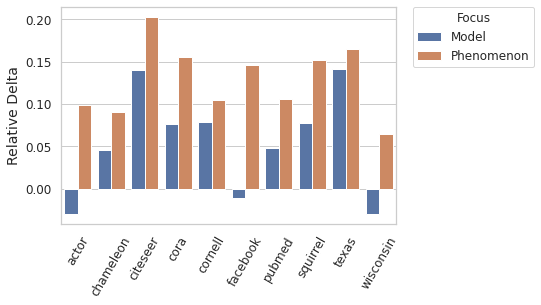

In [53]:
ax = sns.barplot(x="dataset", y="charact_acc", data=dfs, hue = "true_label_as_target")
plt.setp(ax.get_xticklabels(), rotation=60)
#ax.set_title(f"Trade-off: characterization score \n {title}")
# title
# check axes and find which is have legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
leg = ax.get_legend()
new_title = 'Focus'
leg.set_title(new_title)
# replace labels
new_labels = ["Model", "Phenomenon"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.xlabel("")
plt.ylabel("Relative Delta")
#plt.savefig('/cluster/home/kamara/Explain/figures/real/5expe/trade-off_charact_k_10_occlusion_vs_sa.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/real/5expe/trade-off_charact_k_10_ig_vs_sa.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/real/5expe/trade-off_charact_k_10_gradcam_vs_occlusion.pdf', bbox_inches='tight')

### Trade-off Necessary vs Sufficient

In [54]:
#dfs = df_vs[(df_vs.true_label_as_target==True)].groupby(["dataset", "explainer_name"]).mean()
dfs = df_vs.groupby(["dataset", "explainer_name"]).mean()
#dfs = dfs["charact_acc"]
dfs

true_label_as_target  hard_mask   topk  charact_acc  \
dataset   explainer_name                                                        
actor     occlusion                        0.5        0.5  28.25     0.495903   
          sa                               0.5        0.5  28.25     0.530849   
chameleon occlusion                        0.5        0.5  28.25     0.524848   
          sa                               0.5        0.5  28.25     0.592854   
citeseer  occlusion                        0.5        0.5  28.25     0.611409   
          sa                               0.5        0.5  28.25     0.782949   
cora      occlusion                        0.5        0.5  28.25     0.595377   
          sa                               0.5        0.5  28.25     0.711798   
cornell   occlusion                        0.5        0.5  28.25     0.416655   
          sa                               0.5        0.5  28.25     0.508504   
facebook  sa                               0.5        0.5  28.25     0.576170   
pubmed    occlusion                        0.5        0.5  28.25     0.619922   
          sa                               0.5        0.5  28.25     0.696697   
squirrel  occlusion                        0.5        0.5  28.25     0.506803   
          sa                               0.5        0.5  28.25     0.621959   
texas     occlusion                        0.5        0.5  28.25     0.377672   
          sa                               0.5        0.5  28.25     0.530683   
wisconsin occlusion                        0.5        0.5  28.25     0.568147   
          sa                               0.5        0.5  28.25     0.585437   

                          fidelity_acc+  1-fidelity_acc-        time  
dataset   explainer_name                                              
actor     occlusion            0.367563         0.894125    4.082795  
          sa                   0.392500         0.865625    0.029675  
chameleon occlusion            0.510500         0.584875   27.483795  
          sa                   0.697268         0.545283    0.011867  
citeseer  occlusion            0.496937         0.863062    1.086160  
          sa                   0.836250         0.754375    0.045010  
cora      occlusion            0.495688         0.807875    0.604575  
          sa                   0.830937         0.627250    0.008130  
cornell   occlusion            0.288062         0.904687    0.293640  
          sa                   0.384625         0.780250    0.004140  
facebook  sa                   0.821976         0.447836    0.014608  
pubmed    occlusion            0.500188         0.834812    2.546370  
          sa                   0.796250         0.622500    0.040250  
squirrel  occlusion            0.474364         0.622444  739.564625  
          sa                   0.671875         0.631250    0.051300  
texas     occlusion            0.255687         0.901687    0.418240  
          sa                   0.399500         0.821813    0.004370  
wisconsin occlusion            0.434688         0.865125    0.446840  
          sa                   0.583187         0.605250    0.004390

In [55]:
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]
#dfs = dfs.sort_values(by=["1-fidelity_acc-", "fidelity_acc+"])

Text(0, 0.5, 'Relative Delta')

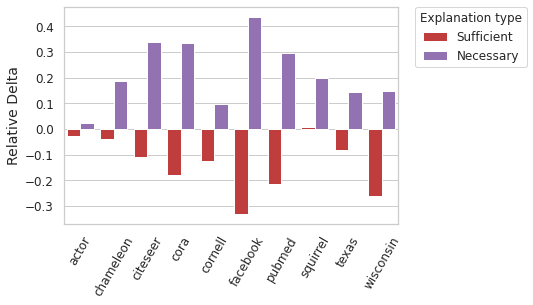

In [56]:
tidy = dfs[["dataset", "1-fidelity_acc-", "fidelity_acc+"]].melt(id_vars='dataset').rename(columns=str.title)
ax = sns.barplot(x='Dataset', y='Value', hue='Variable', data=tidy, palette=sns.color_palette("tab10")[3:])

plt.setp(ax.get_xticklabels(), rotation=60)
#ax.set_title(f"Trade-off: fidelity+/- scores \n {title}")
# title
# check axes and find which is have legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
leg = ax.get_legend()
new_title = 'Explanation type'
leg.set_title(new_title)
# replace labels
new_labels = ["Sufficient", "Necessary"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
plt.xlabel("")
plt.ylabel("Relative Delta")
#plt.savefig('/cluster/home/kamara/Explain/figures/real/5expe/trade-off_type_k_10_occlusion_vs_sa.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/real/5expe/trade-off_type_k_10_ig_vs_sa.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/real/5expe/trade-off_type_k_10_gradcam_vs_occlusion.pdf', bbox_inches='tight')

## Consistency

In [93]:
dfs = df_vs.groupby(["dataset", "explainer_name", "topk"]).mean().reset_index()
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,time
0,actor,gradcam,1.0,0.5,0.5,0.323620,0.2425,0.7175,0.00775
1,actor,gradcam,5.0,0.5,0.5,0.401557,0.2900,0.7975,0.00775
2,actor,gradcam,10.0,0.5,0.5,0.440413,0.3200,0.7900,0.00775
3,actor,gradcam,15.0,0.5,0.5,0.457090,0.3375,0.7850,0.00775
4,actor,gradcam,20.0,0.5,0.5,0.466857,0.3500,0.7725,0.00775
...,...,...,...,...,...,...,...,...,...
139,wisconsin,pagerank,15.0,0.5,0.5,0.562259,0.5000,0.8225,0.02725
140,wisconsin,pagerank,20.0,0.5,0.5,0.555852,0.5175,0.7975,0.02725
141,wisconsin,pagerank,25.0,0.5,0.5,0.571596,0.5325,0.8025,0.02725
142,wisconsin,pagerank,50.0,0.5,0.5,0.599401,0.5275,0.8900,0.02725


In [94]:
grads = []
dfs['consistency'] = pd.Series()

for data in datasets:
    for method in [expl1, expl2]:
        print(method, data)
        sample = dfs[(dfs.dataset==data)&(dfs.explainer_name==method)]
        grad = np.gradient(np.array(sample["charact_acc"]), np.array(sample["topk"])).mean()
        dfs['consistency'].loc[(dfs.dataset==data)&(dfs.explainer_name==method)] = grad

gradcam cora
pagerank cora
gradcam pubmed
pagerank pubmed
gradcam citeseer
pagerank citeseer
gradcam cornell
pagerank cornell
gradcam wisconsin
pagerank wisconsin
gradcam actor
pagerank actor
gradcam chameleon
pagerank chameleon
gradcam squirrel
pagerank squirrel
gradcam facebook
pagerank facebook


/tmp/ipykernel_8271/2071198281.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dfs['consistency'] = pd.Series()
/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [95]:
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,time,consistency
0,actor,gradcam,1.0,0.5,0.5,0.323620,0.2425,0.7175,0.00775,0.005285
1,actor,gradcam,5.0,0.5,0.5,0.401557,0.2900,0.7975,0.00775,0.005285
2,actor,gradcam,10.0,0.5,0.5,0.440413,0.3200,0.7900,0.00775,0.005285
3,actor,gradcam,15.0,0.5,0.5,0.457090,0.3375,0.7850,0.00775,0.005285
4,actor,gradcam,20.0,0.5,0.5,0.466857,0.3500,0.7725,0.00775,0.005285
...,...,...,...,...,...,...,...,...,...,...
139,wisconsin,pagerank,15.0,0.5,0.5,0.562259,0.5000,0.8225,0.02725,0.013294
140,wisconsin,pagerank,20.0,0.5,0.5,0.555852,0.5175,0.7975,0.02725,0.013294
141,wisconsin,pagerank,25.0,0.5,0.5,0.571596,0.5325,0.8025,0.02725,0.013294
142,wisconsin,pagerank,50.0,0.5,0.5,0.599401,0.5275,0.8900,0.02725,0.013294


In [96]:
dfs = dfs.groupby(["dataset", "explainer_name"]).mean()
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,time,consistency
1,actor,pagerank,0.0,0.0,0.0,-0.028317,-0.027188,-0.016563,0.980575,-0.003206
3,chameleon,pagerank,0.0,0.0,0.0,-0.021850,-0.027500,-0.005937,0.804125,-0.000959
5,citeseer,pagerank,0.0,0.0,0.0,0.118958,0.107812,0.008750,0.939825,0.006399
7,cora,pagerank,0.0,0.0,0.0,0.014706,0.009063,-0.013125,0.354725,0.000743
9,cornell,pagerank,0.0,0.0,0.0,-0.029436,-0.020625,-0.020937,0.016100,-0.002322
11,facebook,pagerank,0.0,0.0,0.0,-0.057477,-0.043750,-0.020625,2.825300,-0.003733
13,pubmed,pagerank,0.0,0.0,0.0,0.056341,0.060312,0.006563,1.662900,0.002220
15,squirrel,pagerank,0.0,0.0,0.0,-0.040473,-0.040312,-0.017813,3.593225,-0.002543
17,wisconsin,pagerank,0.0,0.0,0.0,-0.085274,-0.061250,-0.049687,0.021400,-0.005339


Text(0, 0.5, 'Relative Delta')

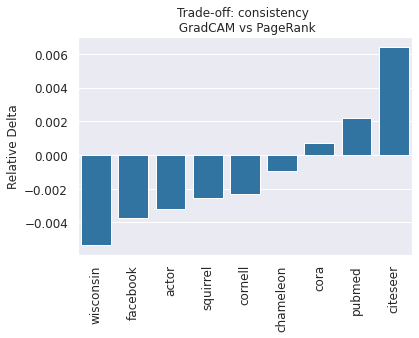

In [97]:
ax = sns.barplot(x="dataset", y="consistency", data=dfs.sort_values(by=["consistency"]),  color=pal_c[0])
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_title(f"Trade-off: consistency \n {title}")
# title
plt.xlabel("")
plt.ylabel("Relative Delta")

## Synthetic

In [9]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_5expe.json'
ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'nc_syn_topk_5expe.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'topk', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [10]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('perturbation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [11]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


In [12]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [13]:
df_res = df_res.reset_index()
#df_res = df_res[df_res.explainer_name!="pgexplainer"]
df_res

,dataset,true_label_as_target,hard_mask,topk,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,number_of_edges,type,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
0,ba_house,False,False,1.0,basic_gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,perturbation,2.000,2.000000,-4.000000,-4.000000,0.288,0.385608,0.071865,0.090947
1,ba_house,False,False,1.0,distance,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,baseline,2.000,2.000000,-4.000000,-4.000000,0.284,0.381684,0.184185,0.234711
2,ba_house,False,False,1.0,gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,perturbation,2.000,2.000000,-4.000000,-4.000000,0.314,0.398758,0.077830,0.106328
3,ba_house,False,False,1.0,ig,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,gradient,2.000,2.000000,-4.000000,-4.000000,0.248,0.354343,0.345203,0.308488
4,ba_house,False,False,1.0,occlusion,100.0,-1.000,-1.000,-1.000000,-1.000000,...,4110.0,perturbation,2.000,2.000000,-4.000000,-4.000000,0.284,0.382105,0.329141,0.315950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,ba_bottleottle,True,True,100.0,pgexplainer,100.0,0.594,0.124,0.489880,0.077676,...,3948.0,perturbation,0.876,0.922324,0.639890,0.707951,2.000,2.000000,-4.000000,-4.000000
1724,ba_bottleottle,True,True,100.0,pgmexplainer,100.0,0.616,0.058,0.510130,0.054867,...,3948.0,perturbation,0.942,0.945133,0.662617,0.744893,2.000,2.000000,-4.000000,-4.000000
1725,ba_bottleottle,True,True,100.0,random,100.0,0.014,0.618,0.008127,0.518846,...,3948.0,baseline,0.382,0.481154,0.015985,0.027010,2.000,2.000000,-4.000000,-4.000000
1726,ba_bottleottle,True,True,100.0,sa,100.0,0.280,0.614,0.271012,0.538878,...,3948.0,gradient,0.386,0.461122,0.341385,0.324565,2.000,2.000000,-4.000000,-4.000000


In [14]:
df_res.columns

Index(['dataset', 'true_label_as_target', 'hard_mask', 'topk',
       'explainer_name', 'num_test', 'fidelity_acc+', 'fidelity_acc-',
       'fidelity_prob+', 'fidelity_prob-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'f1_score', 'precision', 'recall', 'mask_size_init',
       'mask_entropy_init', 'max_avg_init', 'mask_size_transf',
       'mask_entropy_transf', 'max_avg_transf', 'cc_ratio', 'time',
       'number_of_edges', 'type', '1-fidelity_acc-', '1-fidelity_prob-',
       'charact_prob', 'charact_acc', '1-fidelity_gnn_acc-',
       '1-fidelity_gnn_prob-', 'charact_gnn_prob', 'charact_gnn_acc'],
      dtype='object')

In [15]:
df_res.loc[df_res['true_label_as_target']==False, 'charact_prob'] = df_res['charact_gnn_prob']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_prob+'] = df_res['fidelity_gnn_prob+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_prob-"] = df_res["1-fidelity_gnn_prob-"]

df_res.loc[df_res['true_label_as_target']==False, 'charact_acc'] = df_res['charact_gnn_acc']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_acc+'] = df_res['fidelity_gnn_acc+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_acc-"] = df_res["1-fidelity_gnn_acc-"]


In [16]:
datasets = ["ba_house", "ba_grid", "tree_cycle_cycle", "tree_grid", "ba_bottleottle"]

In [17]:
#df_res = df_res[df_res.dataset!="ba_grid"]

## Rank methods

In [18]:
# choose size of explanation
topk_val = 10

In [19]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]
dfc = pd.pivot_table(dfc, values=["charact_acc"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                                    mean_rank  \
dataset                   ba_house ba_grid      tree_cycle_cycle      tree_grid      ba_bottleottle             
explainer_name                                                                
pagerank              0.752132  0.0  0.523875  0.503416  0.766397  0.509164   
subgraphx             0.776056  0.0  0.480064       NaN  0.647018  0.475785   
pgmexplainer          0.521720  0.0  0.518020  0.496686  0.622008  0.431687   
distance              0.497265  0.0  0.506014  0.433780  0.429660  0.373344   
ig                    0.335130  0.0  0.457648  0.492961  0.496168  0.356381   
occlusion             0.394522  0.0  0.509491  0.448710  0.207669  0.312078   
gnnexplainer          0.344516  0.0  0.508925  0.411577  0.244089  0.301822   
basic_gnnexplainer    0.338191  0.0  0.494721  0.414775  0.253799  0.300297   
pgexplainer           0.370885  0.0  0.279329  0.388127  0.393538  0.286376   
sa                    0.211054  0.0  0.387865  0.435395  0.339400  0.274743   
random                0.007890  0.0  0.015789  0.026917  0.003979  0.010915   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
subgraphx                 2.0  
pgmexplainer              3.0  
distance                  4.0  
ig                        5.0  
occlusion                 6.0  
gnnexplainer              7.0  
basic_gnnexplainer        8.0  
pgexplainer               9.0  
sa                       10.0  
random                   11.0

In [20]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Characterization'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Characterization'])

dfc = pd.pivot_table(dfc, values=['Characterization'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc = dfc.sort_values(by=['mean_rank'])
dfc

Characterization                        mean_rank  \
dataset                        ba_house ba_grid  tree_cycle_cycle  tree_grid  ba_bottleottle             
explainer_name                                                         
pagerank                        2.0  6.0   1.0   1.0   1.0       2.2   
pgmexplainer                    3.0  6.0   2.0   2.0   3.0       3.2   
subgraphx                       1.0  6.0   7.0   NaN   2.0       4.0   
distance                        4.0  6.0   5.0   6.0   5.0       5.2   
occlusion                       5.0  6.0   3.0   4.0  10.0       5.6   
ig                              9.0  6.0   8.0   3.0   4.0       6.0   
gnnexplainer                    7.0  6.0   4.0   8.0   9.0       6.8   
basic_gnnexplainer              8.0  6.0   6.0   7.0   8.0       7.0   
pgexplainer                     6.0  6.0  10.0   9.0   6.0       7.4   
sa                             10.0  6.0   9.0   5.0   7.0       7.4   
random                         11.0  6.0  11.0  10.0  11.0       9.8   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
pgmexplainer              2.0  
subgraphx                 3.0  
distance                  4.0  
occlusion                 5.0  
ig                        6.0  
gnnexplainer              7.0  
basic_gnnexplainer        8.0  
pgexplainer               9.5  
sa                        9.5  
random                   11.0

In [21]:
dfc.columns = dfc.columns.droplevel(0) #remove amount
dfc.columns.name = None               #remove categories
dfc = dfc.reset_index()
dfc['type'] = dfc.apply(lambda row: explainer_type(row), axis=1)

In [22]:
sns.set_context("notebook", rc={"legend.fontsize":15, "legend.title_fontsize":20, 
                                "axes.titlesize":22,"axes.labelsize":20,
                               "xtick.labelsize" : 20, "ytick.labelsize" : 20})
sns.set_style("whitegrid")

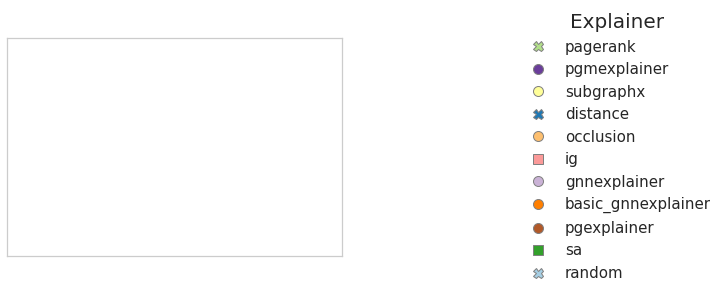

In [23]:
explainer_to_type_dict = dfc.set_index("explainer_name")["type"].to_dict()
handles, labels = [], []
for key, val in explainer_to_type_dict.items():
    # Using Line2D to create the markers for the legend. This is the creation of the proxy artists.
    handles.append(Line2D([0], [0], linewidth=0, color="grey", marker=dict_marker[val], markersize=10, markerfacecolor=dict_color[key]))
    labels.append(key)


# Calling the handles and labels to create the legend, where the handles are the club and circle created previously, and the labels are what the markers are labeled in the legend. Also moves the legend outside the figure
leg = plt.legend(handles,labels, loc = "center left", bbox_to_anchor = (1.5, 0.5), numpoints = 1, title="Explainer", frameon=False)

plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.savefig('/cluster/home/kamara/Explain/figures/syn/5expe/legend_charact_rank_k10_5expe.png', bbox_inches='tight')
plt.savefig('/cluster/home/kamara/Explain/figures/syn/5expe/legend_charact_rank_k10_5expe.pdf', bbox_inches='tight')

#### Necessary

In [24]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'fidelity_acc+']]

dfc = pd.pivot_table(dfc, values=['fidelity_acc+'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

fidelity_acc+                              mean_rank  \
dataset                     ba_house ba_grid    tree_cycle_cycle    tree_grid    ba_bottleottle             
explainer_name                                                            
pagerank                0.713000  0.0  0.4000  0.6520  0.6240  0.477800   
subgraphx               0.766087  0.0  0.3725     NaN  0.6300  0.442147   
pgmexplainer            0.523000  0.0  0.3850  0.5955  0.5250  0.405700   
distance                0.540000  0.0  0.4180  0.5750  0.3430  0.375200   
ig                      0.326500  0.0  0.3855  0.6250  0.5040  0.368200   
occlusion               0.428000  0.0  0.4270  0.6225  0.1380  0.323100   
sa                      0.305000  0.0  0.3075  0.5930  0.3080  0.302700   
gnnexplainer            0.333000  0.0  0.4330  0.5040  0.1730  0.288600   
basic_gnnexplainer      0.326000  0.0  0.4155  0.5060  0.1855  0.286600   
pgexplainer             0.359000  0.0  0.1970  0.4570  0.3890  0.280400   
random                  0.004000  0.0  0.0080  0.0140  0.0020  0.005600   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
subgraphx                 2.0  
pgmexplainer              3.0  
distance                  4.0  
ig                        5.0  
occlusion                 6.0  
sa                        7.0  
gnnexplainer              8.0  
basic_gnnexplainer        9.0  
pgexplainer              10.0  
random                   11.0

In [25]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "fidelity_acc+"]]

dfc['Necessary'] = dfc.groupby('dataset')['fidelity_acc+'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Necessary'])

dfc = pd.pivot_table(dfc, values=["Necessary"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Necessary                        mean_rank final_rank
dataset                 ba_house ba_grid  tree_cycle_cycle  tree_grid  ba_bottleottle                     
explainer_name                                                          
pagerank                 2.0  6.0   5.0   1.0   2.0       3.2        1.0
subgraphx                1.0  6.0   8.0   NaN   1.0       4.0        2.0
distance                 3.0  6.0   3.0   6.0   6.0       4.8        3.5
pgmexplainer             4.0  6.0   7.0   4.0   3.0       4.8        3.5
ig                       8.0  6.0   6.0   2.0   4.0       5.2        5.5
occlusion                5.0  6.0   2.0   3.0  10.0       5.2        5.5
gnnexplainer             7.0  6.0   1.0   8.0   9.0       6.2        7.0
basic_gnnexplainer       9.0  6.0   4.0   7.0   8.0       6.8        8.0
pgexplainer              6.0  6.0  10.0   9.0   5.0       7.2        9.0
sa                      10.0  6.0   9.0   5.0   7.0       7.4       10.0
random                  11.0  6.0  11.0  10.0  11.0       9.8       11.0

#### Sufficient

In [26]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", '1-fidelity_acc-']]

dfc = pd.pivot_table(dfc, values=['1-fidelity_acc-'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

1-fidelity_acc-                              mean_rank  \
dataset                       ba_house ba_grid    tree_cycle_cycle    tree_grid    ba_bottleottle             
explainer_name                                                              
pagerank                  0.796000  1.0  0.7590  0.4100  0.9930  0.791600   
subgraphx                 0.786304  1.0  0.6750     NaN  0.6650  0.781576   
pgmexplainer              0.520500  1.0  0.7915  0.4260  0.7630  0.700200   
distance                  0.461000  1.0  0.6410  0.3490  0.5750  0.605200   
ig                        0.347000  1.0  0.5635  0.4070  0.4890  0.561300   
occlusion                 0.366000  1.0  0.6315  0.3510  0.4200  0.553700   
gnnexplainer              0.357500  1.0  0.6175  0.3480  0.4150  0.547600   
basic_gnnexplainer        0.352000  1.0  0.6115  0.3515  0.4025  0.543500   
pgexplainer               0.395000  1.0  0.5750  0.3380  0.3990  0.541400   
random                    0.286000  1.0  0.6000  0.3480  0.3760  0.522000   
sa                        0.162000  1.0  0.5255  0.3440  0.3780  0.481900   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
subgraphx                 2.0  
pgmexplainer              3.0  
distance                  4.0  
ig                        5.0  
occlusion                 6.0  
gnnexplainer              7.0  
basic_gnnexplainer        8.0  
pgexplainer               9.0  
random                   10.0  
sa                       11.0

In [27]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "1-fidelity_acc-"]]

dfc['Sufficient'] = dfc.groupby('dataset')['1-fidelity_acc-'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Sufficient'])

dfc = pd.pivot_table(dfc, values=["Sufficient"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Sufficient                        mean_rank final_rank
dataset                  ba_house ba_grid  tree_cycle_cycle  tree_grid  ba_bottleottle                     
explainer_name                                                           
pagerank                  1.0  6.0   2.0   2.0   1.0       2.4        1.0
pgmexplainer              3.0  6.0   1.0   1.0   2.0       2.6        2.0
subgraphx                 2.0  6.0   3.0   NaN   3.0       3.5        3.0
distance                  4.0  6.0   4.0   6.0   4.0       4.8        4.0
occlusion                 6.0  6.0   5.0   5.0   6.0       5.6        5.0
basic_gnnexplainer        8.0  6.0   7.0   4.0   8.0       6.6        6.5
ig                        9.0  6.0  10.0   3.0   5.0       6.6        6.5
gnnexplainer              7.0  6.0   6.0   8.0   7.0       6.8        8.0
pgexplainer               5.0  6.0   9.0  10.0   9.0       7.8        9.0
random                   10.0  6.0   8.0   7.0  11.0       8.4       10.0
sa                       11.0  6.0  11.0   9.0  10.0       9.4       11.0

#### Phenomenon

In [28]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'charact_acc']]

dfc = pd.pivot_table(dfc, values=['charact_acc'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                                    mean_rank  \
dataset                   ba_house ba_grid      tree_cycle_cycle      tree_grid      ba_bottleottle             
explainer_name                                                                
pagerank              0.751019  0.0  0.523875  0.503416  0.766397  0.508941   
subgraphx             0.778491  0.0  0.475459       NaN  0.649385  0.475834   
pgmexplainer          0.519963  0.0  0.517007  0.494458  0.621011  0.430488   
distance              0.496992  0.0  0.506014  0.433780  0.429660  0.373289   
ig                    0.337440  0.0  0.456818  0.491405  0.492743  0.355681   
occlusion             0.392284  0.0  0.508229  0.449135  0.200870  0.310104   
gnnexplainer          0.354228  0.0  0.502166  0.406476  0.241549  0.300884   
basic_gnnexplainer    0.324007  0.0  0.496478  0.417826  0.245051  0.296673   
pgexplainer           0.371325  0.0  0.279329  0.388098  0.393538  0.286458   
sa                    0.214698  0.0  0.389220  0.438892  0.339599  0.276482   
random                0.007890  0.0  0.015789  0.026917  0.003979  0.010915   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
subgraphx                 2.0  
pgmexplainer              3.0  
distance                  4.0  
ig                        5.0  
occlusion                 6.0  
gnnexplainer              7.0  
basic_gnnexplainer        8.0  
pgexplainer               9.0  
sa                       10.0  
random                   11.0

In [29]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Phenomenon'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Phenomenon'])

dfc = pd.pivot_table(dfc, values=['Phenomenon'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Phenomenon                        mean_rank final_rank
dataset                  ba_house ba_grid  tree_cycle_cycle  tree_grid  ba_bottleottle                     
explainer_name                                                           
pagerank                  2.0  6.0   1.0   1.0   1.0       2.2        1.0
pgmexplainer              3.0  6.0   2.0   2.0   3.0       3.2        2.0
subgraphx                 1.0  6.0   7.0   NaN   2.0       4.0        3.0
distance                  4.0  6.0   4.0   6.0   5.0       5.0        4.0
occlusion                 5.0  6.0   3.0   4.0  10.0       5.6        5.0
ig                        8.0  6.0   8.0   3.0   4.0       5.8        6.0
gnnexplainer              7.0  6.0   5.0   8.0   9.0       7.0        7.0
basic_gnnexplainer        9.0  6.0   6.0   7.0   8.0       7.2        8.0
pgexplainer               6.0  6.0  10.0   9.0   6.0       7.4        9.5
sa                       10.0  6.0   9.0   5.0   7.0       7.4        9.5
random                   11.0  6.0  11.0  10.0  11.0       9.8       11.0

#### Model

In [30]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'charact_acc']]

dfc = pd.pivot_table(dfc, values=['charact_acc'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                                    mean_rank  \
dataset                   ba_house ba_grid      tree_cycle_cycle      tree_grid      ba_bottleottle             
explainer_name                                                                
pagerank              0.753244  0.0  0.523875  0.503416  0.766397  0.509386   
subgraphx             0.773621  0.0  0.484670       NaN  0.644651  0.475735   
pgmexplainer          0.523476  0.0  0.519033  0.498915  0.623005  0.432886   
distance              0.497538  0.0  0.506014  0.433780  0.429660  0.373398   
ig                    0.332820  0.0  0.458478  0.494516  0.499593  0.357081   
occlusion             0.396760  0.0  0.510752  0.448285  0.214468  0.314053   
basic_gnnexplainer    0.352376  0.0  0.492964  0.411725  0.262547  0.303922   
gnnexplainer          0.334804  0.0  0.515685  0.416678  0.246630  0.302759   
pgexplainer           0.370445  0.0  0.279329  0.388156  0.393538  0.286294   
sa                    0.207410  0.0  0.386510  0.431898  0.339201  0.273004   
random                0.007889  0.0  0.015789  0.026917  0.003979  0.010915   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
subgraphx                 2.0  
pgmexplainer              3.0  
distance                  4.0  
ig                        5.0  
occlusion                 6.0  
basic_gnnexplainer        7.0  
gnnexplainer              8.0  
pgexplainer               9.0  
sa                       10.0  
random                   11.0

In [31]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc["Model"] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', "Model"])

dfc = pd.pivot_table(dfc, values=["Model"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Model                        mean_rank final_rank
dataset             ba_house ba_grid  tree_cycle_cycle  tree_grid  ba_bottleottle                     
explainer_name                                                      
pagerank             2.0  6.0   1.0   1.0   1.0       2.2        1.0
pgmexplainer         3.0  6.0   2.0   2.0   3.0       3.2        2.0
subgraphx            1.0  6.0   7.0   NaN   2.0       4.0        3.0
distance             4.0  6.0   5.0   5.0   5.0       5.0        4.0
occlusion            5.0  6.0   4.0   4.0  10.0       5.8        5.0
ig                   9.0  6.0   8.0   3.0   4.0       6.0        6.0
gnnexplainer         8.0  6.0   3.0   7.0   9.0       6.6        7.0
basic_gnnexplainer   7.0  6.0   6.0   8.0   8.0       7.0        8.0
pgexplainer          6.0  6.0  10.0   9.0   6.0       7.4        9.0
sa                  10.0  6.0   9.0   6.0   7.0       7.6       10.0
random              11.0  6.0  11.0  10.0  11.0       9.8       11.0

#### Accuracy

In [32]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)&(df_res.hard_mask==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'f1_score']]

dfc = pd.pivot_table(dfc, values=['f1_score'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

f1_score                                          \
dataset                 ba_house      ba_grid      tree_cycle_cycle      tree_grid      ba_bottleottle   
explainer_name                                                         
distance            0.789578  0.670214  0.307385  0.384231  0.742005   
pagerank            0.864364  0.573961  0.312848  0.329908  0.803018   
subgraphx           0.677116  0.648274  0.246531       NaN  0.581952   
pgmexplainer        0.529438  0.441799  0.336545  0.319268  0.477503   
pgexplainer         0.592673  0.492686  0.197303  0.121322  0.561335   
gnnexplainer        0.373605  0.556952  0.284460  0.326023  0.269517   
basic_gnnexplainer  0.382540  0.549026  0.281730  0.330458  0.253282   
ig                  0.435621  0.138497  0.253424  0.314039  0.409834   
occlusion           0.163817  0.000182  0.187435  0.301888  0.049519   
sa                  0.108164  0.000000  0.080672  0.161781  0.098304   
random              0.002517  0.005455  0.003250  0.004545  0.002933   

                   mean_rank final_rank  
dataset                                  
explainer_name                           
distance            0.578683        1.0  
pagerank            0.576820        2.0  
subgraphx           0.538468        3.0  
pgmexplainer        0.420911        4.0  
pgexplainer         0.393064        5.0  
gnnexplainer        0.362111        6.0  
basic_gnnexplainer  0.359407        7.0  
ig                  0.310283        8.0  
occlusion           0.140568        9.0  
sa                  0.089784       10.0  
random              0.003740       11.0

In [33]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)&(df_res.hard_mask==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'f1_score']]

dfc["Accuracy"] = dfc.groupby('dataset')['f1_score'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', "Accuracy"])

dfc = pd.pivot_table(dfc, values=["Accuracy"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Accuracy                         mean_rank final_rank
dataset                ba_house  ba_grid  tree_cycle_cycle  tree_grid  ba_bottleottle                     
explainer_name                                                          
distance                2.0   1.0   3.0   1.0   2.0       1.8        1.5
pagerank                1.0   3.0   2.0   2.0   1.0       1.8        1.5
subgraphx               3.0   2.0   6.0   NaN   3.0       3.5        3.0
pgmexplainer            5.0   7.0   1.0   5.0   5.0       4.6        4.0
basic_gnnexplainer      7.0   5.0   5.0   3.0   7.0       5.4        5.0
gnnexplainer            8.0   4.0   4.0   4.0   8.0       5.6        6.0
pgexplainer             4.0   6.0   8.0   9.0   4.0       6.2        7.0
ig                      6.0   8.0   7.0   6.0   6.0       6.6        8.0
occlusion               9.0  10.0   9.0   7.0  10.0       9.0        9.0
sa                     10.0  11.0  10.0   8.0   9.0       9.6       10.0
random                 11.0   9.0  11.0  10.0  11.0      10.4       11.0

## Compare Explainer 1 vs Explainer 2

In [34]:
sns.set_context("notebook", rc={"legend.fontsize":14, "legend.title_fontsize":14, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})

In [99]:
df_res['dataset'] = df_res['dataset'].replace({"ba_grid": "ba_community", "tree_cycle_cycle": "ba_grid", "tree_gridtree_cycle"tree_cycle", "ba_bottleottle": "tree_grid"})

In [145]:
expl1 = "distance"#"pgmexplainer"#"gnnexplainer"#"occlusion"
expl2 = "pagerank"#"pagerank"#"sa"
title = "Distance vs PageRank"#"PageRank vs PGMExplainer"#"PageRank vs SubgraphX"#"PGMExplainer vs SubgraphX"
#Always exlp2 - expl1

In [146]:
df_vs = df_res[(df_res.explainer_name==expl1)|(df_res.explainer_name==expl2)].groupby(["explainer_name", "dataset", 'true_label_as_target','hard_mask', 'topk']).mean()
df_vs = df_vs[["charact_acc", "fidelity_acc+", "1-fidelity_acc-", "f1_score", "time"]]
df_vs = df_vs.reset_index()
df_vs


,explainer_name,dataset,true_label_as_target,hard_mask,topk,charact_acc,fidelity_acc+,1-fidelity_acc-,f1_score,time
0,distance,ba_house,False,False,1.0,0.234711,0.200,0.284,0.265143,0.01372
1,distance,ba_house,False,False,5.0,0.306083,0.262,0.368,0.687592,0.01372
2,distance,ba_house,False,False,10.0,0.408930,0.454,0.372,0.789578,0.01372
3,distance,ba_house,False,False,15.0,0.438237,0.546,0.366,0.707127,0.01372
4,distance,ba_house,False,False,20.0,0.447592,0.576,0.366,0.591291,0.01372
...,...,...,...,...,...,...,...,...,...,...
315,pagerank,tree_grid,True,True,15.0,0.765502,0.624,0.990,0.763692,0.01928
316,pagerank,tree_grid,True,True,20.0,0.762494,0.624,0.980,0.664800,0.01928
317,pagerank,tree_grid,True,True,25.0,0.760060,0.624,0.972,0.554889,0.01928
318,pagerank,tree_grid,True,True,50.0,0.765502,0.624,0.990,0.333333,0.01928


In [147]:
np.unique(df_vs['dataset'])

array(['ba_house', 'ba_community', 'ba_grid', 'tree_cycle_cycle', 'tree_grid'], dtype=object)

### Trade-off Phenomenon vs Model

In [148]:
#dfs = df_vs[(df_vs.true_label_as_target==True)].groupby(["dataset", "explainer_name"]).mean()
dfs = df_vs.groupby(["true_label_as_target", "dataset", "explainer_name"]).mean()

In [149]:
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]

In [150]:
dfs = dfs.sort_values(by='charact_acc')

In [151]:
np.unique(dfs['dataset'])

array(['ba_house', 'ba_community', 'ba_grid', 'tree_cycle_cycle', 'tree_grid'], dtype=object)

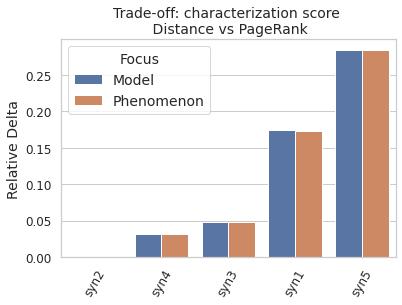

In [152]:
ax = sns.barplot(x="dataset", y="charact_acc", data=dfs, hue = "true_label_as_target")
plt.setp(ax.get_xticklabels(), rotation=60)
ax.set_title(f"Trade-off: characterization score \n {title}")
# title
# check axes and find which is have legend
leg = ax.get_legend()
new_title = 'Focus'
leg.set_title(new_title)
# replace labels
new_labels = ["Model", "Phenomenon"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("")
plt.ylabel("Relative Delta")
ax.set_box_aspect(6.5/len(ax.patches))
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_charact_k_10_pgmexplainer_vs_subgraphx_syn.pdf', bbox_inches='tight')
plt.savefig('/cluster/home/kamara/Explain/figures/syn/5expe/trade-off_charact_k_10_distance_vs_pagerank_syn.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_charact_k_10_pagerank_vs_pgmexplainer_syn.pdf', bbox_inches='tight')


### Trade-off Necessary vs Sufficient

In [153]:
#dfs = df_vs[(df_vs.true_label_as_target==True)].groupby(["dataset", "explainer_name"]).mean()
dfs = df_vs.groupby(["dataset", "explainer_name"]).mean()
#dfs = dfs["charact_acc"]
dfs

true_label_as_target  hard_mask   topk  charact_acc  \
dataset explainer_name                                                        
ba_house    distance                         0.5        0.5  28.25     0.518764   
        pagerank                         0.5        0.5  28.25     0.693122   
ba_community    distance                         0.5        0.5  28.25     0.000000   
        pagerank                         0.5        0.5  28.25     0.000000   
ba_grid    distance                         0.5        0.5  28.25     0.464419   
        pagerank                         0.5        0.5  28.25     0.512874   
tree_cycle_cycle    distance                         0.5        0.5  28.25     0.465215   
        pagerank                         0.5        0.5  28.25     0.497303   
tree_grid    distance                         0.5        0.5  28.25     0.406038   
        pagerank                         0.5        0.5  28.25     0.690632   

                        fidelity_acc+  1-fidelity_acc-  f1_score      time  
dataset explainer_name                                                      
ba_house    distance             0.532062         0.530438  0.488077  0.013910  
        pagerank             0.659625         0.747125  0.580893  0.020100  
ba_community    distance             0.000000         1.000000  0.540020  0.017175  
        pagerank             0.000000         1.000000  0.586091  0.027670  
ba_grid    distance             0.360625         0.687000  0.211425  0.006970  
        pagerank             0.381625         0.798750  0.225082  0.013190  
tree_cycle_cycle    distance             0.531875         0.447750  0.329248  0.013410  
        pagerank             0.578625         0.473250  0.336890  0.020550  
tree_grid    distance             0.328000         0.592250  0.458573  0.013950  
        pagerank             0.562500         0.894500  0.540673  0.019760

In [154]:
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]
dfs = dfs.sort_values(by=["1-fidelity_acc-", "fidelity_acc+"])

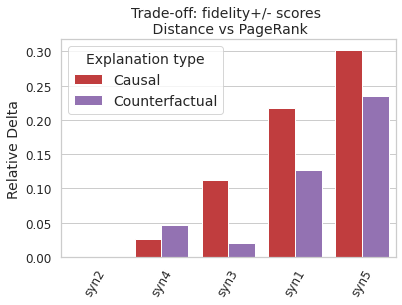

In [155]:
tidy = dfs[["dataset", "1-fidelity_acc-", "fidelity_acc+"]].melt(id_vars='dataset').rename(columns=str.title)
ax = sns.barplot(x='Dataset', y='Value', hue='Variable', data=tidy, palette=sns.color_palette("tab10")[3:])

plt.setp(ax.get_xticklabels(), rotation=60)
ax.set_title(f"Trade-off: fidelity+/- scores \n {title}")
# title
# check axes and find which is have legend
leg = ax.get_legend()
new_title = 'Explanation type'
leg.set_title(new_title)
# replace labels
new_labels = ["Sufficient", "Necessary"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
plt.xlabel("")
plt.ylabel("Relative Delta")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_box_aspect(6.5/len(ax.patches)) #change 10 to modify the y/x axis ratio
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_type_k_10_pgmexplainer_vs_subgraphx_syn.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_type_k_10_pagerank_vs_subgraphx_syn.pdf', bbox_inches='tight')
plt.savefig('/cluster/home/kamara/Explain/figures/syn/5expe/trade-off_type_k_10_distance_vs_pagerank_syn.pdf', bbox_inches='tight')


### Accuracy

In [156]:
dfs = df_vs.groupby(["dataset", "explainer_name", "topk"]).mean().reset_index()
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,f1_score,time
0,ba_house,distance,1.0,0.5,0.5,0.235388,0.2000,0.2860,0.265143,0.01391
1,ba_house,distance,5.0,0.5,0.5,0.330744,0.3150,0.3560,0.687592,0.01391
2,ba_house,distance,10.0,0.5,0.5,0.497265,0.5400,0.4610,0.789578,0.01391
3,ba_house,distance,15.0,0.5,0.5,0.578843,0.6195,0.5565,0.707127,0.01391
4,ba_house,distance,20.0,0.5,0.5,0.614561,0.6425,0.6175,0.591291,0.01391
...,...,...,...,...,...,...,...,...,...,...
75,tree_grid,pagerank,15.0,0.5,0.5,0.766098,0.6240,0.9920,0.763692,0.01976
76,tree_grid,pagerank,20.0,0.5,0.5,0.763998,0.6240,0.9850,0.664800,0.01976
77,tree_grid,pagerank,25.0,0.5,0.5,0.762781,0.6240,0.9810,0.554889,0.01976
78,tree_grid,pagerank,50.0,0.5,0.5,0.765800,0.6240,0.9910,0.333333,0.01976


In [157]:
dfs = dfs.groupby(["dataset", "explainer_name"]).mean()
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,f1_score,time
1,ba_house,pagerank,0.0,0.0,0.0,0.174358,0.127563,0.216688,0.092816,0.006190
3,ba_community,pagerank,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.046071,0.010495
5,ba_grid,pagerank,0.0,0.0,0.0,0.048455,0.021000,0.111750,0.013657,0.006220
7,tree_cycle_cycle,pagerank,0.0,0.0,0.0,0.032088,0.046750,0.025500,0.007642,0.007140
9,tree_grid,pagerank,0.0,0.0,0.0,0.284594,0.234500,0.302250,0.082100,0.005810


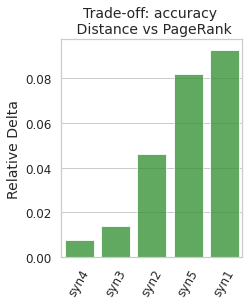

In [158]:
ax = sns.barplot(x="dataset", y="f1_score", data=dfs.sort_values(by=["f1_score"]), color=pal_c[2], alpha=0.8)
plt.setp(ax.get_xticklabels(), rotation=60)
ax.set_title(f"Trade-off: accuracy \n {title}")
# title
plt.xlabel("")
plt.ylabel("Relative Delta")
ax.set_box_aspect(6/len(ax.patches))
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_accuracy_k_10_pgmexplainer_vs_subgraphx_syn.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_accuracy_k_10_pagerank_vs_subgraphx_syn.pdf', bbox_inches='tight')
plt.savefig('/cluster/home/kamara/Explain/figures/syn/5expe/trade-off_accuracy_k_10_distance_vs_pagerank_syn.pdf', bbox_inches='tight')
